# Email Spam Classification

 ### Problem Introduction
 The primary goal of this notebook is to develop a predictive model that accurately classifies incoming Email messages as either spam or not. We will use the email.csv dataset, which consists 5172 rows, each row for each email. There are 3002 columns.
 https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv/data
 

### Data Description
This is a csv file containing related information of 5172 randomly picked email files and their respective labels for spam or not-spam classification. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words.

In [74]:
# import the necssary libraries 
import numpy as np
import pandas as pd 
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import chi2_contingency, f_oneway,ttest_ind,stats
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
# FROM THE CLASSROOM LABS FOR HELP
def train_and_evaluate(classifier, X_train, X_test, y_train, y_test):
    """
    Train a classifier, make predictions on the test set, and calculate accuracy.
    
    Parameters:
    - classifier: The classifier model to be trained and evaluated.
    - X_train: The training data features.
    - X_test: The testing data features.
    - y_train: The training data labels.
    - y_test: The testing data labels.
    
    Returns:
    - accuracy: The accuracy of the classifier on the test set.
    """
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


### Data Preprocessing 

In [3]:
data = pd.read_csv('emails.csv')

In [4]:
data.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.tail(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5162,Email 5163,2,3,1,2,1,2,32,0,0,...,0,0,0,0,0,0,0,0,0,1
5163,Email 5164,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5164,Email 5165,21,18,3,1,6,4,106,1,2,...,0,0,0,0,0,0,0,0,0,0
5165,Email 5166,1,0,1,0,3,1,12,1,0,...,0,0,0,1,0,0,0,0,0,0
5166,Email 5167,1,0,1,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [7]:
data.shape

(5172, 3002)

In [8]:
data.describe().columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [10]:
# no null values 
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [11]:
# handle useless cols
data.drop(columns=['Email No.'],inplace=True)

In [12]:
# change the prediction col 
#data['Prediction'] = data['Prediction'].replace({0: 'not spam', 1: 'spam'})

In [13]:
data.sample(5)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
4802,13,7,4,13,4,5,65,1,0,17,...,0,0,0,1,0,0,0,3,0,1
1002,2,3,15,1,2,0,46,1,7,1,...,0,0,0,0,0,0,0,0,0,0
2397,1,5,1,1,1,1,20,1,0,3,...,0,0,0,0,0,0,0,1,0,1
3562,2,5,2,3,1,1,30,3,0,9,...,0,0,0,0,0,0,0,0,0,0
4040,2,2,1,2,2,2,42,9,2,6,...,0,0,0,0,0,0,0,0,0,1


In [14]:
data.min()

the           0
to            0
ect           1
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [15]:
data.max()

the           210
to            132
ect           344
and            89
for            47
             ... 
military        4
allowing        3
ff            114
dry             4
Prediction      1
Length: 3001, dtype: int64

In [16]:
data.mean()

the           6.640565
to            6.188128
ect           5.143852
and           3.075599
for           3.124710
                ...   
military      0.006574
allowing      0.004060
ff            0.914733
dry           0.006961
Prediction    0.290023
Length: 3001, dtype: float64

In [17]:
data.var()

the           137.945235
to             90.908132
ect           198.842192
and            36.553750
for            21.907283
                 ...    
military        0.019295
allowing        0.005205
ff              7.729530
dry             0.009621
Prediction      0.205950
Length: 3001, dtype: float64

In [18]:
data.corr()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


In [19]:
data.std()

the           11.745009
to             9.534576
ect           14.101142
and            6.045970
for            4.680522
                ...    
military       0.138908
allowing       0.072145
ff             2.780203
dry            0.098086
Prediction     0.453817
Length: 3001, dtype: float64

In [20]:
for column in data.columns:
    print(f"{column}:")
    print(f"  Min: {data[column].min()}")
    print(f"  Max: {data[column].max()}")
    print(f"  Mean: {data[column].mean()}")
    print(f"  Variance: {data[column].var()}")
    print(f"  Standard Deviation: {data[column].std()}")
    print(f"  Skewness: {skew(data[column])}")
    print(f"  Kurtosis: {kurtosis(data[column])}")

the:
  Min: 0
  Max: 210
  Mean: 6.640564578499613
  Variance: 137.94523487747696
  Standard Deviation: 11.745008934755093
  Skewness: 4.5646316224067025
  Kurtosis: 35.69760681074179
to:
  Min: 0
  Max: 132
  Mean: 6.188128383604021
  Variance: 90.90813209877209
  Standard Deviation: 9.534575611886043
  Skewness: 3.789569767757151
  Kurtosis: 22.021511701569644
ect:
  Min: 1
  Max: 344
  Mean: 5.143851508120649
  Variance: 198.84219193154541
  Standard Deviation: 14.101141511648814
  Skewness: 11.685934626971237
  Kurtosis: 210.85872640226108
and:
  Min: 0
  Max: 89
  Mean: 3.075599381283836
  Variance: 36.55374988240419
  Standard Deviation: 6.0459697222533455
  Skewness: 4.498862797229211
  Kurtosis: 30.909454411230364
for:
  Min: 0
  Max: 47
  Mean: 3.124709976798144
  Variance: 21.90728332333577
  Standard Deviation: 4.6805216935012455
  Skewness: 3.6381042728517885
  Kurtosis: 18.21158702233871
of:
  Min: 0
  Max: 77
  Mean: 2.6270301624129933
  Variance: 38.81097296138057
  Stan

  Kurtosis: 33.172531537390334
june:
  Min: 0
  Max: 9
  Mean: 0.0848801237432328
  Variance: 0.2045518518036478
  Standard Deviation: 0.45227408924638585
  Skewness: 7.974423883887736
  Kurtosis: 88.28086283161281
x:
  Min: 0
  Max: 82
  Mean: 2.7324052590873937
  Variance: 30.161602954665057
  Standard Deviation: 5.491958025573854
  Skewness: 6.622881674449642
  Kurtosis: 63.85214049172953
within:
  Min: 0
  Max: 10
  Mean: 0.08352668213457076
  Variance: 0.3476922207151083
  Standard Deviation: 0.5896543230699732
  Skewness: 10.015090657197305
  Kurtosis: 111.392598948405
nbsp:
  Min: 0
  Max: 279
  Mean: 0.09377416860015468
  Variance: 15.94769281149065
  Standard Deviation: 3.9934562488514445
  Skewness: 66.3142007438389
  Kurtosis: 4602.660872155869
she:
  Min: 0
  Max: 20
  Mean: 0.30452436194895594
  Variance: 1.0290802803966057
  Standard Deviation: 1.0144359419877658
  Skewness: 7.2219066313518745
  Kurtosis: 90.93653964964447
how:
  Min: 0
  Max: 23
  Mean: 0.312645011600928

  Max: 5
  Mean: 0.04215003866976025
  Variance: 0.06745528748211328
  Standard Deviation: 0.2597215575998906
  Skewness: 8.671468830280087
  Kurtosis: 103.3494096473195
review:
  Min: 0
  Max: 13
  Mean: 0.06612529002320186
  Variance: 0.22034135579421663
  Standard Deviation: 0.4694053214378983
  Skewness: 16.213115228254658
  Kurtosis: 349.49740984741146
great:
  Min: 0
  Max: 11
  Mean: 0.07095901005413767
  Variance: 0.16146935666411283
  Standard Deviation: 0.40183249826776435
  Skewness: 12.917008041301342
  Kurtosis: 261.94983133023993
tom:
  Min: 0
  Max: 16
  Mean: 0.2525135344160866
  Variance: 0.7140238491689632
  Standard Deviation: 0.8449993190346151
  Skewness: 6.694316699730905
  Kurtosis: 71.44916918318818
put:
  Min: 0
  Max: 13
  Mean: 0.15564578499613302
  Variance: 0.553414260893055
  Standard Deviation: 0.7439181815852164
  Skewness: 7.870300155231366
  Kurtosis: 77.18790487156998
done:
  Min: 0
  Max: 4
  Mean: 0.05007733952049497
  Variance: 0.06730419049781419


  Skewness: 25.069995272083762
  Kurtosis: 1011.7974647143076
aep:
  Min: 0
  Max: 28
  Mean: 0.04795050270688322
  Variance: 0.5728308403265625
  Standard Deviation: 0.756855891386572
  Skewness: 24.15666407005371
  Kurtosis: 697.9605567917979
y:
  Min: 0
  Max: 326
  Mean: 13.343774168600154
  Variance: 388.1912143740569
  Standard Deviation: 19.70256872527176
  Skewness: 4.150203462920136
  Kurtosis: 32.92013527827479
state:
  Min: 0
  Max: 22
  Mean: 0.21094354215003866
  Variance: 1.838108798204294
  Standard Deviation: 1.3557687111761703
  Skewness: 9.552975145294699
  Kurtosis: 102.5952032752988
ees:
  Min: 0
  Max: 30
  Mean: 0.09841453982985306
  Variance: 0.5014324113762496
  Standard Deviation: 0.7081189245997099
  Skewness: 20.185385428878526
  Kurtosis: 677.2772560085696
rita:
  Min: 0
  Max: 6
  Mean: 0.05162412993039443
  Variance: 0.11549339727490367
  Standard Deviation: 0.33984319512814093
  Skewness: 9.193817938760185
  Kurtosis: 103.84460446463831
provided:
  Min: 0

  Kurtosis: 40.057789163543625
east:
  Min: 0
  Max: 20
  Mean: 0.12935034802784223
  Variance: 0.5191383904795236
  Standard Deviation: 0.7205125887030175
  Skewness: 11.438498789299478
  Kurtosis: 195.64944560976315
requirements:
  Min: 0
  Max: 4
  Mean: 0.022235112142304718
  Variance: 0.040309990737501716
  Standard Deviation: 0.20077348116098828
  Skewness: 10.58742264737964
  Kurtosis: 127.34331926096561
code:
  Min: 0
  Max: 11
  Mean: 0.027842227378190254
  Variance: 0.0847013574274889
  Standard Deviation: 0.2910349762957863
  Skewness: 18.21226671626166
  Kurtosis: 489.446216199506
value:
  Min: 0
  Max: 9
  Mean: 0.036156225831399845
  Variance: 0.08552287483456521
  Standard Deviation: 0.2924429428701695
  Skewness: 14.296534351129285
  Kurtosis: 299.6941178086727
thank:
  Min: 0
  Max: 9
  Mean: 0.44934261407579273
  Variance: 0.6230376648399946
  Standard Deviation: 0.7893273496085097
  Skewness: 2.9620605182313446
  Kurtosis: 15.766925530174689
together:
  Min: 0
  Max:

  Skewness: 9.558173161504461
  Kurtosis: 123.17902949095118
oct:
  Min: 0
  Max: 9
  Mean: 0.11504253673627224
  Variance: 0.24764062862924413
  Standard Deviation: 0.4976350355725008
  Skewness: 6.60275066836534
  Kurtosis: 60.34044198670943
play:
  Min: 0
  Max: 12
  Mean: 0.060904872389791184
  Variance: 0.22699960649722306
  Standard Deviation: 0.47644475702564204
  Skewness: 12.84926332429872
  Kurtosis: 210.1661202129777
enrononline:
  Min: 0
  Max: 14
  Mean: 0.019721577726218097
  Variance: 0.13730195302105874
  Standard Deviation: 0.37054278163399534
  Skewness: 27.347651631081124
  Kurtosis: 862.9082834465585
compliance:
  Min: 0
  Max: 3
  Mean: 0.01720804331013148
  Variance: 0.02078292093316667
  Standard Deviation: 0.14416282784811996
  Skewness: 9.645679119326724
  Kurtosis: 110.97873627278821
spam:
  Min: 0
  Max: 5
  Mean: 0.017788089713843776
  Variance: 0.03526658204337682
  Standard Deviation: 0.18779398830467608
  Skewness: 16.24366345732134
  Kurtosis: 338.530876

  Min: 0
  Max: 6
  Mean: 0.016821345707656612
  Variance: 0.045936287550464194
  Standard Deviation: 0.21432752401514882
  Skewness: 17.502723275264042
  Kurtosis: 358.764382907283
communications:
  Min: 0
  Max: 30
  Mean: 0.021848414539829854
  Variance: 0.232552916100822
  Standard Deviation: 0.482237406368297
  Skewness: 49.23023888805393
  Kurtosis: 2923.382366173541
director:
  Min: 0
  Max: 9
  Mean: 0.027262180974477957
  Variance: 0.06326745938553177
  Standard Deviation: 0.251530235529512
  Skewness: 16.55457537621574
  Kurtosis: 422.0922462573029
partners:
  Min: 0
  Max: 10
  Mean: 0.024168600154679042
  Variance: 0.06961495358357166
  Standard Deviation: 0.2638464583494947
  Skewness: 23.34239071631331
  Kurtosis: 731.359377885509
investors:
  Min: 0
  Max: 5
  Mean: 0.015274555297757154
  Variance: 0.03438277124955912
  Standard Deviation: 0.18542591849458134
  Skewness: 16.52801417697052
  Kurtosis: 332.98078730257583
expedia:
  Min: 0
  Max: 18
  Mean: 0.01604795050270

  Max: 2
  Mean: 0.011987625676720804
  Variance: 0.013780074880688444
  Standard Deviation: 0.11738856367077861
  Skewness: 10.692173388894021
  Kurtosis: 127.02539147542424
sec:
  Min: 0
  Max: 17
  Mean: 0.23511214230471772
  Variance: 1.3343847679282568
  Standard Deviation: 1.1551557331928266
  Skewness: 7.957653102148693
  Kurtosis: 73.99874463228598
head:
  Min: 0
  Max: 15
  Mean: 0.12664346481051816
  Variance: 0.35506643406483374
  Standard Deviation: 0.5958745120114081
  Skewness: 10.328568039565893
  Kurtosis: 172.12495074613557
enjoy:
  Min: 0
  Max: 6
  Mean: 0.018368136117556073
  Variance: 0.029250633739861222
  Standard Deviation: 0.17102816651026
  Skewness: 15.643213382132028
  Kurtosis: 385.6025182860111
img:
  Min: 0
  Max: 43
  Mean: 0.03441608662026296
  Variance: 0.8864579262388343
  Standard Deviation: 0.941518946298392
  Skewness: 35.26648138481703
  Kurtosis: 1337.2363023841297
rnd:
  Min: 0
  Max: 6
  Mean: 0.013921113689095127
  Variance: 0.0531807541702510

  Kurtosis: 544.1078401727527
buyer:
  Min: 0
  Max: 4
  Mean: 0.011987625676720804
  Variance: 0.01764779872520806
  Standard Deviation: 0.13284501769057078
  Skewness: 15.237729052967772
  Kurtosis: 309.42937741651946
objectives:
  Min: 0
  Max: 4
  Mean: 0.010054137664346482
  Variance: 0.014983017760869601
  Standard Deviation: 0.12240513780421801
  Skewness: 18.524054908712408
  Kurtosis: 481.9905850211549
prod:
  Min: 0
  Max: 43
  Mean: 0.34551430781129155
  Variance: 2.0436213366742124
  Standard Deviation: 1.42955284500931
  Skewness: 10.667680132413299
  Kurtosis: 202.2747402904
represent:
  Min: 0
  Max: 6
  Mean: 0.03750966744006187
  Variance: 0.07749431918712367
  Standard Deviation: 0.2783780149133973
  Skewness: 11.015017868011292
  Kurtosis: 168.743920838671
sandi:
  Min: 0
  Max: 7
  Mean: 0.017014694508894045
  Variance: 0.06198079808224091
  Standard Deviation: 0.24895943059510903
  Skewness: 18.645420545782333
  Kurtosis: 398.3961178484524
hplnol:
  Min: 0
  Max: 4

  Standard Deviation: 0.18419266464616774
  Skewness: 23.970181776854993
  Kurtosis: 656.3228842778227
pep:
  Min: 0
  Max: 6
  Mean: 0.011214230471771076
  Variance: 0.037004365622250804
  Standard Deviation: 0.19236518817668338
  Skewness: 21.615153320795176
  Kurtosis: 520.7970848744603
payments:
  Min: 0
  Max: 7
  Mean: 0.010440835266821345
  Variance: 0.028125351942679105
  Standard Deviation: 0.16770614759954122
  Skewness: 27.36729536778651
  Kurtosis: 956.012921529672
wallis:
  Min: 0
  Max: 3
  Mean: 0.010054137664346482
  Variance: 0.013435928223063304
  Standard Deviation: 0.11591345143279663
  Skewness: 13.64772454752657
  Kurtosis: 221.5106646126856
rev:
  Min: 0
  Max: 15
  Mean: 0.2846094354215004
  Variance: 0.952050843368733
  Standard Deviation: 0.9757309277504393
  Skewness: 6.944105603929711
  Kurtosis: 69.62526646480309
kenneth:
  Min: 0
  Max: 4
  Mean: 0.011987625676720804
  Variance: 0.024996474029792062
  Standard Deviation: 0.15810273251842316
  Skewness: 16.

  Skewness: 11.695768005417984
  Kurtosis: 134.79098923655897
emirates:
  Min: 0
  Max: 1
  Mean: 0.007153905645784996
  Variance: 0.007104100849179573
  Standard Deviation: 0.08428582828198092
  Skewness: 11.695768005417984
  Kurtosis: 134.79098923655897
aeor:
  Min: 0
  Max: 1
  Mean: 0.007153905645784996
  Variance: 0.007104100849179573
  Standard Deviation: 0.08428582828198092
  Skewness: 11.695768005417984
  Kurtosis: 134.79098923655897
clickathome:
  Min: 0
  Max: 13
  Mean: 0.010634184068058779
  Variance: 0.0793686172647956
  Standard Deviation: 0.2817243639886256
  Skewness: 32.798287004198436
  Kurtosis: 1226.8481329164554
materia:
  Min: 0
  Max: 8
  Mean: 0.04563031709203403
  Variance: 0.184341760813434
  Standard Deviation: 0.42935039398308933
  Skewness: 11.971292894383964
  Kurtosis: 157.36472741803186
island:
  Min: 0
  Max: 9
  Mean: 0.008313998453209591
  Variance: 0.0244909104750563
  Standard Deviation: 0.15649572030907524
  Skewness: 40.15918561928128
  Kurtosis: 

  Mean: 0.009474091260634185
  Variance: 0.026404132571691736
  Standard Deviation: 0.16249348470536207
  Skewness: 23.12992680660073
  Kurtosis: 622.2008755613939
chevron:
  Min: 0
  Max: 6
  Mean: 0.006767208043310132
  Variance: 0.025287787220746562
  Standard Deviation: 0.15902134202913318
  Skewness: 30.41265951278776
  Kurtosis: 1025.9697159563887
treatment:
  Min: 0
  Max: 2
  Mean: 0.008507347254447023
  Variance: 0.009596920657668219
  Standard Deviation: 0.09796387424795029
  Skewness: 12.493231422263376
  Kurtosis: 173.22548578140405
lesson:
  Min: 0
  Max: 4
  Mean: 0.009280742459396751
  Variance: 0.02273342184528194
  Standard Deviation: 0.15077606522681886
  Skewness: 20.466576035075533
  Kurtosis: 471.74602895908157
player:
  Min: 0
  Max: 7
  Mean: 0.01817478731631864
  Variance: 0.05729869850943467
  Standard Deviation: 0.23937146552886096
  Skewness: 16.664772421158286
  Kurtosis: 323.35489224034103
sds:
  Min: 0
  Max: 4
  Mean: 0.012954369682907967
  Variance: 0.04

  Kurtosis: 236.57407585657995
hand:
  Min: 0
  Max: 16
  Mean: 0.08236658932714618
  Variance: 0.20632601681426035
  Standard Deviation: 0.4542312371625936
  Skewness: 15.880784848765302
  Kurtosis: 438.7980231865634
producing:
  Min: 0
  Max: 5
  Mean: 0.0075406032482598605
  Variance: 0.014833865107970474
  Standard Deviation: 0.12179435581327434
  Skewness: 23.9002176157682
  Kurtosis: 744.3811795774378
dl:
  Min: 0
  Max: 36
  Mean: 0.1954756380510441
  Variance: 0.8658623341579422
  Standard Deviation: 0.9305172401186032
  Skewness: 18.205728351480563
  Kurtosis: 543.562808873639
developing:
  Min: 0
  Max: 5
  Mean: 0.006187161639597835
  Variance: 0.013111972699193952
  Standard Deviation: 0.11450752245679736
  Skewness: 26.37355454307373
  Kurtosis: 891.3249720187616
design:
  Min: 0
  Max: 12
  Mean: 0.0257153905645785
  Variance: 0.05986846897212943
  Standard Deviation: 0.24468034038747255
  Skewness: 26.868341385976347
  Kurtosis: 1157.1660362236983
woman:
  Min: 0
  Max: 

  Skewness: 10.503404326550982
  Kurtosis: 174.92118410128933
capture:
  Min: 0
  Max: 2
  Mean: 0.010634184068058779
  Variance: 0.011683449985739443
  Standard Deviation: 0.10809000872300568
  Skewness: 10.883661161975153
  Kurtosis: 130.10652298674785
extremely:
  Min: 0
  Max: 2
  Mean: 0.00580046403712297
  Variance: 0.0073150234149848455
  Standard Deviation: 0.08552791015209506
  Skewness: 16.4893340838127
  Kurtosis: 303.367056349827
ya:
  Min: 0
  Max: 56
  Mean: 0.168600154679041
  Variance: 1.2092401208895742
  Standard Deviation: 1.0996545461596448
  Skewness: 30.17349208697443
  Kurtosis: 1367.4115147940895
causing:
  Min: 0
  Max: 2
  Mean: 0.005607115235885538
  Variance: 0.006350298522173133
  Standard Deviation: 0.07968876032523742
  Skewness: 15.458221924544661
  Kurtosis: 266.0175435805276
consent:
  Min: 0
  Max: 7
  Mean: 0.0069605568445475635
  Variance: 0.030893332035126002
  Standard Deviation: 0.17576499092574152
  Skewness: 33.64704760159371
  Kurtosis: 1244.9

  Skewness: 17.389039236681384
  Kurtosis: 338.366614710369
wayne:
  Min: 0
  Max: 1
  Mean: 0.005027068832173241
  Variance: 0.005002764689685712
  Standard Deviation: 0.07073022472525951
  Skewness: 13.997432957189448
  Kurtosis: 193.9281293910132
hansen:
  Min: 0
  Max: 1
  Mean: 0.004447022428460944
  Variance: 0.004428102588308633
  Standard Deviation: 0.06654398987368156
  Skewness: 14.895436620125148
  Kurtosis: 219.87403210416542
indicative:
  Min: 0
  Max: 2
  Mean: 0.004833720030935808
  Variance: 0.006358374975677269
  Standard Deviation: 0.07973941920830167
  Skewness: 18.509410148599557
  Kurtosis: 380.01661320117216
sabrae:
  Min: 0
  Max: 3
  Mean: 0.008120649651972157
  Variance: 0.013084303367746792
  Standard Deviation: 0.1143866398131652
  Skewness: 16.84414626816358
  Kurtosis: 326.6119296728723
dating:
  Min: 0
  Max: 3
  Mean: 0.009280742459396751
  Variance: 0.010743477927277457
  Standard Deviation: 0.10365074976707818
  Skewness: 13.2776894598941
  Kurtosis: 22

  Skewness: 25.361916523926467
  Kurtosis: 762.6109910176627
prefer:
  Min: 0
  Max: 3
  Mean: 0.013147718484145398
  Variance: 0.016458316600866163
  Standard Deviation: 0.12828997077272317
  Skewness: 11.41607462928941
  Kurtosis: 156.49180796090022
awesome:
  Min: 0
  Max: 1
  Mean: 0.004640371229698376
  Variance: 0.004619731404078135
  Standard Deviation: 0.06796860601835332
  Skewness: 14.57753964167692
  Kurtosis: 210.50466200466195
macintosh:
  Min: 0
  Max: 17
  Mean: 0.004447022428460944
  Variance: 0.0570291468737416
  Standard Deviation: 0.23880776133480588
  Skewness: 69.79935844719122
  Kurtosis: 4959.352009834131
feet:
  Min: 0
  Max: 4
  Mean: 0.005027068832173241
  Variance: 0.010804350456462218
  Standard Deviation: 0.10394397749009905
  Skewness: 29.131230679300653
  Kurtosis: 998.7817789835085
constitutes:
  Min: 0
  Max: 1
  Mean: 0.004447022428460944
  Variance: 0.00442810258830869
  Standard Deviation: 0.06654398987368197
  Skewness: 14.895436620125148
  Kurtosis

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


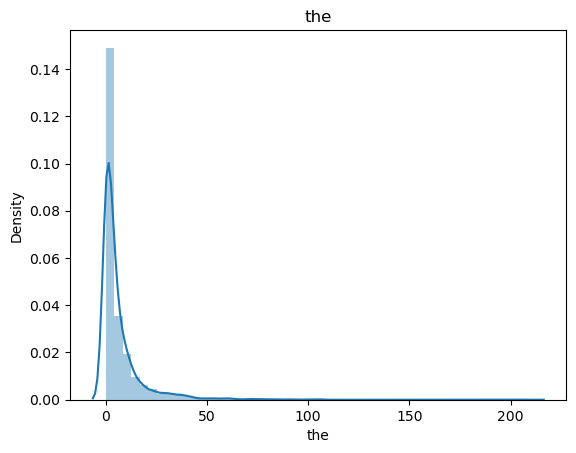

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


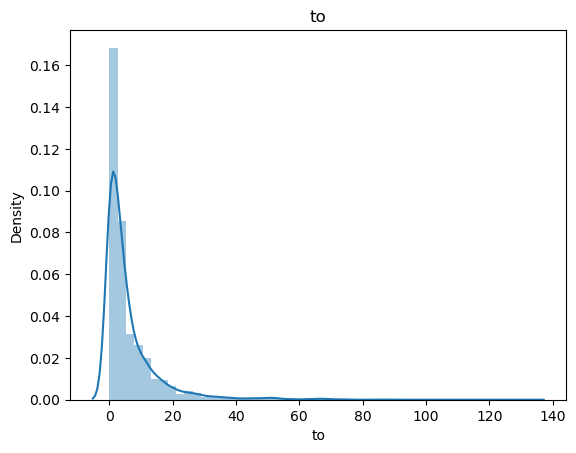

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


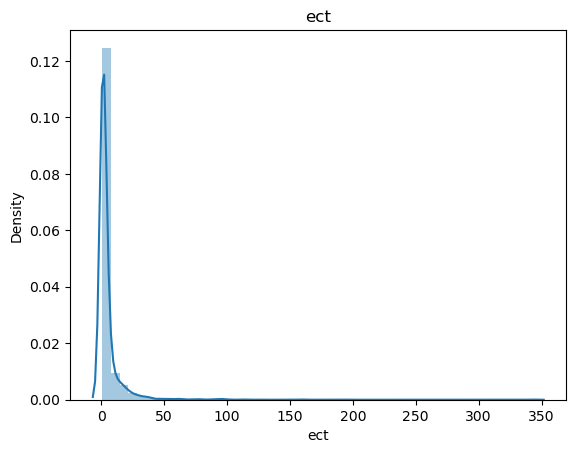

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


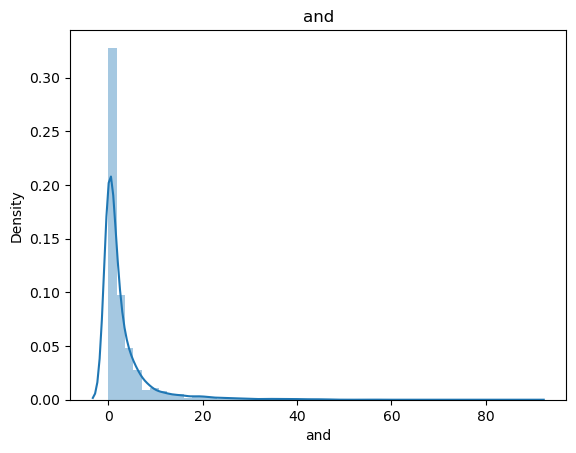

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


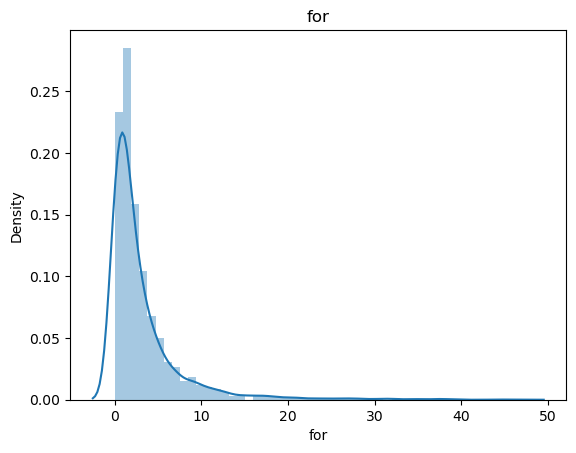

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


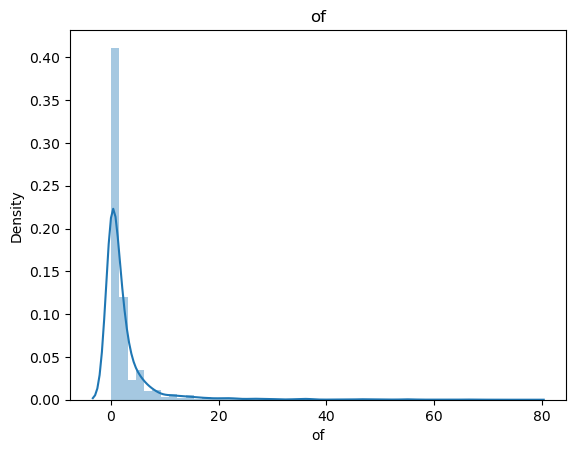

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


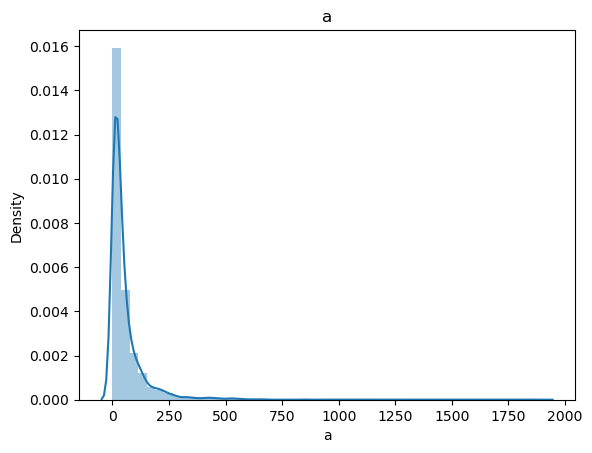

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


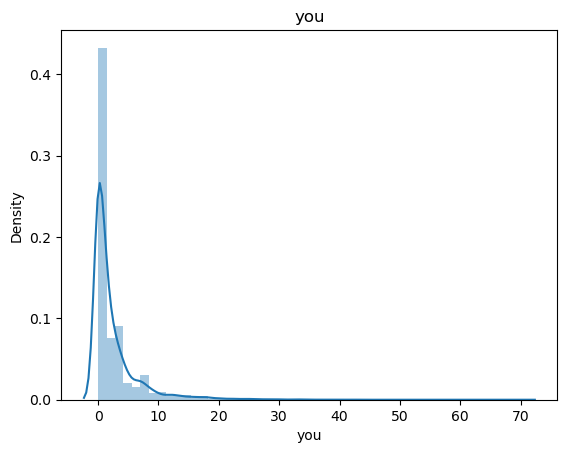

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


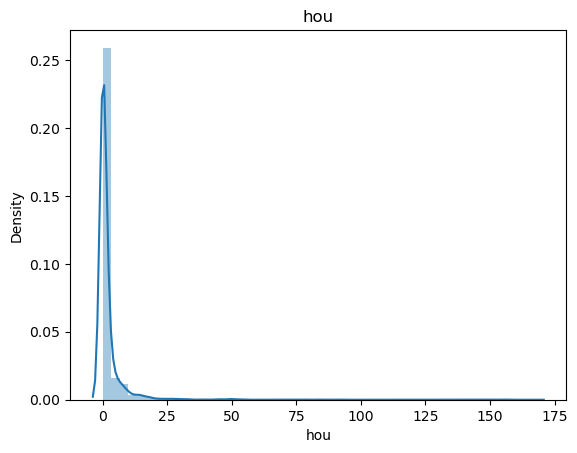

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\3325784994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


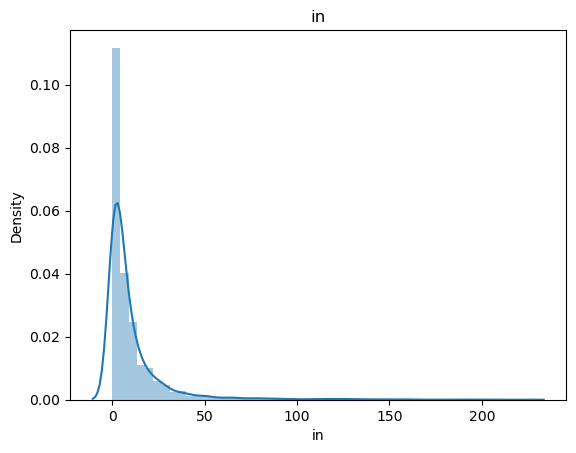

In [21]:
#density plot
for i in data.columns[:10] :
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

Text(0.5, 1.0, 'Number of Spam and not')

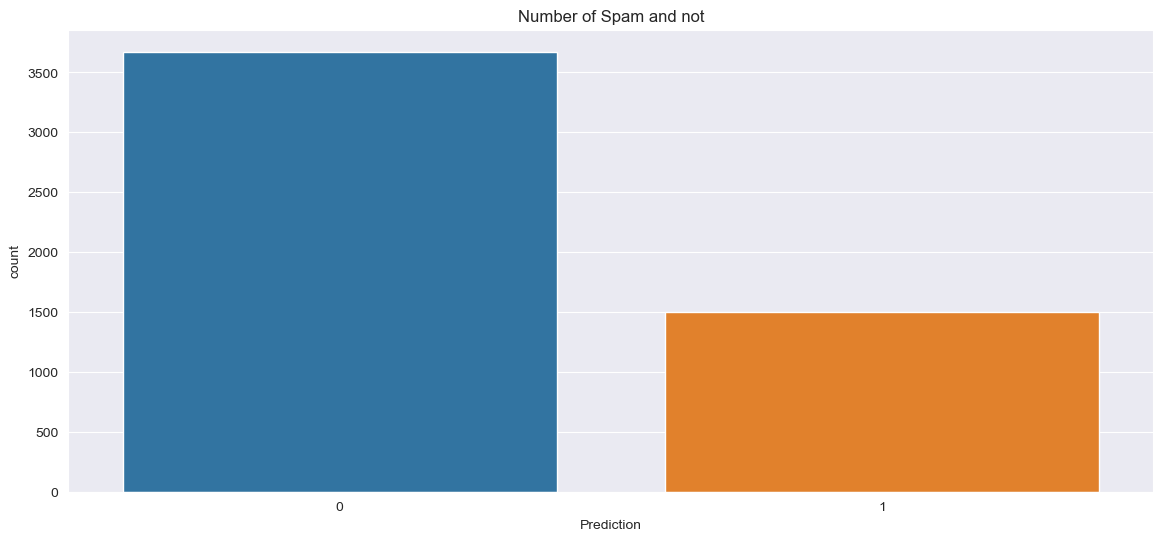

In [22]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='Prediction',data=data)
plt.title('Number of Spam and not')

In [23]:
spam_skewness = skew(data['Prediction'])
spam_kurtosis = kurtosis(data['Prediction'])
print(f"Skewness of 'Prediction' column: {spam_skewness}")
print(f"Kurtosis of 'Prediction' column: {spam_kurtosis}")

Skewness of 'Prediction' column: 0.9254710865424939
Kurtosis of 'Prediction' column: -1.143503267973855


Skewness of 'in' column: 4.6233721758307
Kurtosis of 'in' column: 28.72757277033731


C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_10232\2444049525.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['in'])
C:\Users\El-Wattaneya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


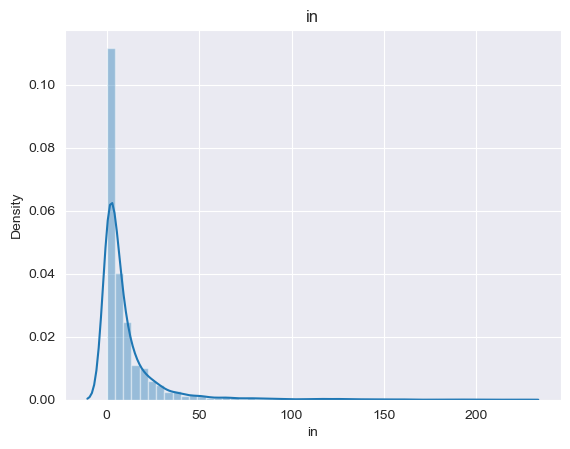

In [24]:
spam_skewness = skew(data['in'])
spam_kurtosis = kurtosis(data['in'])
print(f"Skewness of 'in' column: {spam_skewness}")
print(f"Kurtosis of 'in' column: {spam_kurtosis}")
sns.distplot(data['in'])
plt.title('in')
plt.show()

In [25]:
target_column = 'Prediction'
numeric_features = data.select_dtypes(include=[np.number])
cov_matrix = numeric_features.cov()
cov_matrix

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,137.945235,95.490182,55.854461,59.733618,43.104784,58.272027,806.854931,23.886931,24.847668,191.515507,...,0.011090,0.177019,0.309180,1.494534,0.115047,0.211220,0.107629,11.163506,0.058778,-0.023564
to,95.490182,90.908132,50.482698,47.585079,34.896859,44.710868,748.533276,20.918400,23.119183,162.106759,...,0.013365,0.192762,0.259070,1.389019,0.085643,0.121370,0.082585,10.779920,0.066762,0.239181
ect,55.854461,50.482698,198.842192,23.262958,24.405573,15.639429,493.970035,9.477642,95.715311,81.130436,...,0.200398,0.088503,0.075824,0.494308,0.005963,-0.015063,0.004444,5.545821,0.003446,-0.772922
and,59.733618,47.585079,23.262958,36.553750,21.260151,30.496390,431.622451,12.436391,9.940142,101.921164,...,0.003294,0.126104,0.192582,0.872688,0.088443,0.070669,0.054421,6.727391,0.025194,0.313789
for,43.104784,34.896859,24.405573,21.260151,21.907283,19.870541,305.000247,10.013165,10.731442,68.829414,...,0.010976,0.039043,0.129016,0.569478,0.060579,0.043659,0.040878,3.917810,0.017503,-0.006588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.211220,0.121370,-0.015063,0.070669,0.043659,0.063176,1.358617,0.003894,0.005255,0.323070,...,-0.000033,-0.000083,0.000704,0.008251,0.000552,0.019295,0.000553,0.019126,0.000148,0.004088
allowing,0.107629,0.082585,0.004444,0.054421,0.040878,0.048894,0.665661,0.025760,-0.000486,0.192109,...,-0.000020,-0.000051,-0.000043,0.000762,0.001917,0.000553,0.005205,0.019298,-0.000028,0.000369
ff,11.163506,10.779920,5.545821,6.727391,3.917810,7.694550,113.087057,2.339731,2.212482,24.032425,...,0.001589,0.040909,0.042292,0.260149,0.030531,0.019126,0.019298,7.729530,0.013550,0.170934
dry,0.058778,0.066762,0.003446,0.025194,0.017503,0.016134,0.805913,0.012223,0.000411,0.147050,...,-0.000035,0.000686,-0.000074,0.001058,-0.000030,0.000148,-0.000028,0.013550,0.009621,-0.000279


In [26]:
correlation_matrix = numeric_features.corr()
correlation_matrix

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


<Axes: >

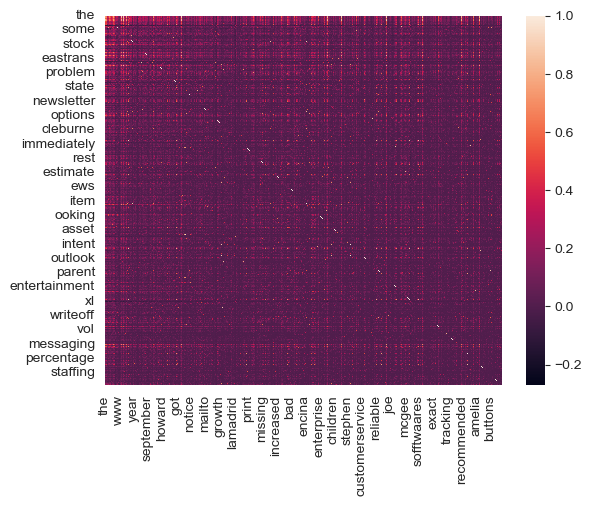

In [27]:
sns.heatmap(correlation_matrix)

In [28]:
crosstab = pd.crosstab(data['Prediction'], data['the'])
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)
chi2_stat

282.2970351318756

In [29]:
p_value

5.852586203532801e-22

In [30]:
group1 = data[data['Prediction'] == 0]['the']
group2 = data[data['Prediction'] == 1]['in']
z_stat, p_value = ttest_ind(group1, group2)
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: -15.943802395443837
P-value: 6.642657915267651e-56


In [31]:
groups = [group for name, group in data.groupby('Prediction')['the']]
anova_stat, p_value = f_oneway(*groups)
anova_stat

0.1010441357992621

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = data.drop('Prediction', axis=1)  
y = data['Prediction']  
lda = LinearDiscriminantAnalysis(n_components=1) 
X_lda = lda.fit_transform(X, y)
data_lda = pd.DataFrame(X_lda, columns=['LDA_Component'])
data_lda['Prediction'] = y


In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop('Prediction', axis=1)  
y = data['Prediction']  

X_standardized = StandardScaler().fit_transform(X)
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_standardized)

data_pca = pd.DataFrame(X_pca, columns=['PCA_Component1', 'PCA_Component2'])
data_pca['Prediction'] = y


In [34]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

### Naive Bayesian

In [35]:
X = data.drop("Prediction",axis=1)     
y= data["Prediction"] 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [37]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
print(f"Naive Bayesian Accuracy: {accuracy_score(y_test, nb_predictions)}")

Naive Bayesian Accuracy: 0.9478260869565217


In [38]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
nb_cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=cv)
avg_accuracy_nb = np.mean(nb_cv_scores)
print(f"Naive Bayesian Average Accuracy: {avg_accuracy_nb}")

Naive Bayesian Average Accuracy: 0.9509323028932934


In [39]:
predictions= nb_classifier.predict(X_test)
predictions[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [40]:
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)
print('Naive Bayesian Confusion Matrix:\n', conf_matrix_nb)
print('Naive Bayesian Classification Report:\n', classification_report(y_test, nb_predictions))

Naive Bayesian Confusion Matrix:
 [[697  42]
 [ 12 284]]
Naive Bayesian Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       739
           1       0.87      0.96      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



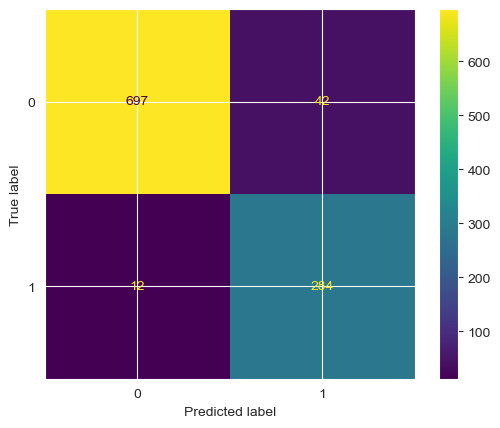

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, nb_predictions)
plt.show()

### Bayesian Belief Network 

In [94]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
feature_names = X.columns.tolist()
edge_list = [(feature, 'Prediction') for feature in feature_names]

In [95]:
bbn_model = BayesianNetwork(edge_list)
bbn_model.fit(data, estimator=MaximumLikelihoodEstimator)

ValueError: Product space too large to allocate arrays!

In [ ]:
#bbn_predictions_binary = (bbn_predictions > 0.5).astype(int)
#bbn_accuracy = accuracy_score(y_test, bbn_predictions_binary)
#print(f"Bayesian Belief Network Accuracy: {bbn_accuracy}")

In [ ]:
#conf_matrix_bbn = confusion_matrix(y_test, bbn_predictions_binary)
#print('Bayesian Belief Network Confusion Matrix:\n', conf_matrix_bbn)
#print('Bayesian Belief Network Classification Report:\n', classification_report(y_test, bbn_predictions_binary))

### KNN 

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier  = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

In [45]:
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

Accuracy score:  0.9478260869565217


In [46]:
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
print('K-NN Confusion Matrix:\n', conf_matrix_knn)
print('K-NN Classification Report:\n', classification_report(y_test, knn_predictions))

K-NN Confusion Matrix:
 [[652  87]
 [ 49 247]]
K-NN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       739
           1       0.74      0.83      0.78       296

    accuracy                           0.87      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.88      0.87      0.87      1035



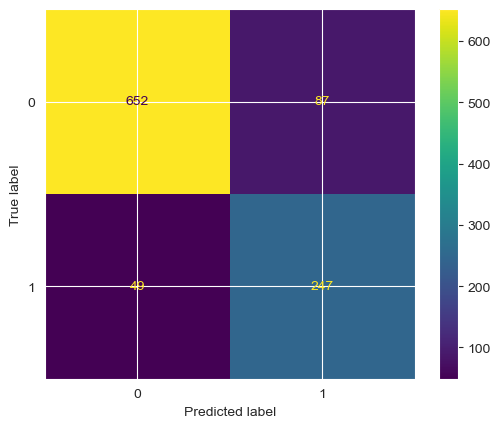

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier  = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

In [49]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
knn_cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=cv)
# Average accuracy
avg_accuracy_knn = np.mean(knn_cv_scores)
print(f"K-Nearest Neighbors Average Accuracy: {avg_accuracy_knn}")

K-Nearest Neighbors Average Accuracy: 0.8687471157609427


In [50]:
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
print('K-NN Confusion Matrix:\n', conf_matrix_knn)
print('K-NN Classification Report:\n', classification_report(y_test, knn_predictions))

K-NN Confusion Matrix:
 [[668  71]
 [ 62 234]]
K-NN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       739
           1       0.77      0.79      0.78       296

    accuracy                           0.87      1035
   macro avg       0.84      0.85      0.84      1035
weighted avg       0.87      0.87      0.87      1035



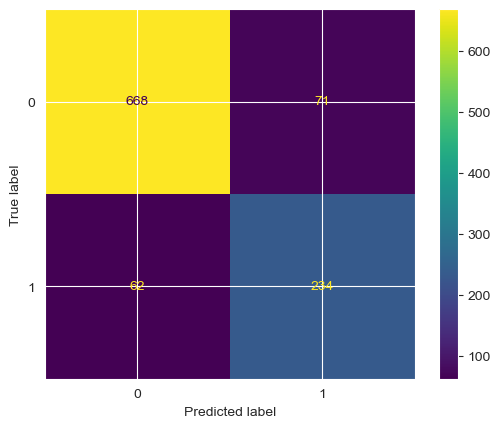

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)
plt.show()

# id3

In [52]:
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)
dt_entropy_predictions = dt_entropy.predict(X_test)
print(f"Decision Tree (Entropy) Accuracy: {accuracy_score(y_test, dt_entropy_predictions)}")

Decision Tree (Entropy) Accuracy: 0.9265700483091788


In [88]:
dt= DecisionTreeClassifier( criterion='gini', ccp_alpha = 0.015) 
dt.fit(X_train, y_train)    
predictions = dt.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, dt_entropy_predictions)))

Accuracy score:  0.9265700483091788


In [55]:
conf_matrix_dt = confusion_matrix(y_test, dt_entropy_predictions)
print('Decision Tree (Entropy) Confusion Matrix:\n', conf_matrix_dt)
print('Decision Tree (Entropy) Classification Report:\n', classification_report(y_test, dt_entropy_predictions))

Decision Tree (Entropy) Confusion Matrix:
 [[697  42]
 [ 34 262]]
Decision Tree (Entropy) Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       739
           1       0.86      0.89      0.87       296

    accuracy                           0.93      1035
   macro avg       0.91      0.91      0.91      1035
weighted avg       0.93      0.93      0.93      1035



### NN

In [70]:
# Standardize the data for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Neural Network (Multi-layer Perceptron)
nn_classifier = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
nn_classifier.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)

In [72]:
nn_predictions = nn_classifier.predict(X_test_scaled)
print(f"Neural Network Accuracy: {accuracy_score(y_test, nn_predictions)}")

Neural Network Accuracy: 0.9690821256038648


In [83]:
conf_matrix_nn = confusion_matrix(y_test, nn_predictions)
print('Neural Network Confusion Matrix:\n', conf_matrix_nn)
print('Neural Network Classification Report:\n', classification_report(y_test, nn_predictions))

Neural Network Confusion Matrix:
 [[711  28]
 [  4 292]]
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       739
           1       0.91      0.99      0.95       296

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



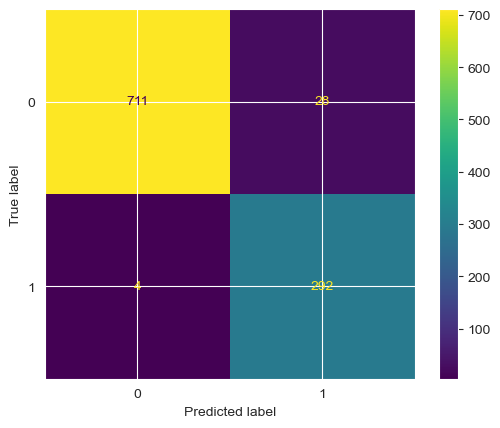

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, nn_predictions)
plt.show()

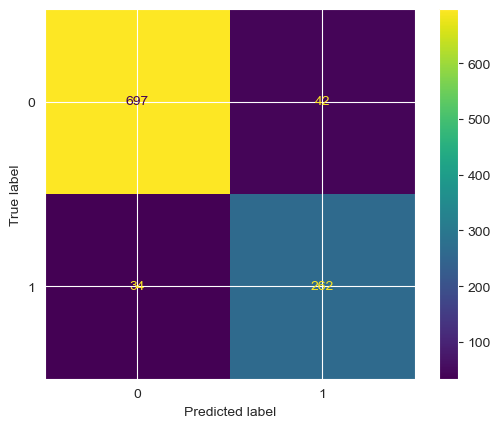

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, dt_entropy_predictions)
plt.show()

In [57]:
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

confusion_matrix: 
 [[708  31]
 [127 169]]
Precision score:  0.845
Recall score:  0.5709459459459459
F1 score:  0.6814516129032259


In [58]:
#ANOTHER WAY
conf_matrix = confusion_matrix(y_test, predictions)
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
total_instances = conf_matrix.sum()
error_rate = (FP + FN) / total_instances
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"Error Rate: {error_rate:.2f}")


Accuracy: 0.85
Precision: 0.84
Recall: 0.57
F1-Score: 0.68
Error Rate: 0.15


In [80]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

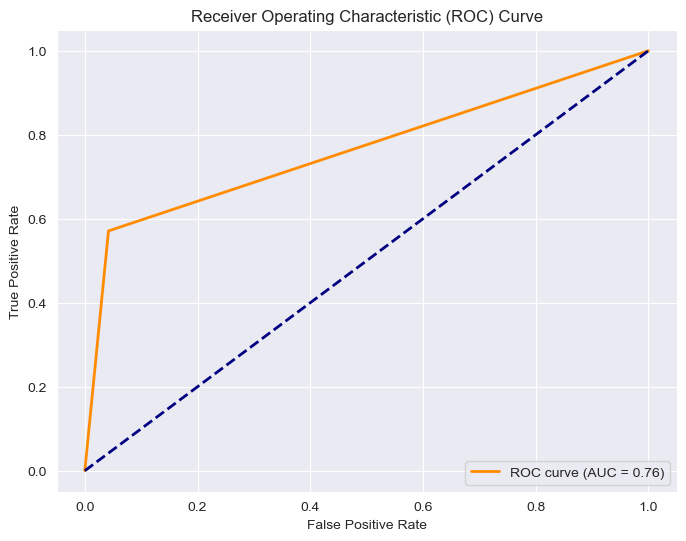

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [59]:
from sklearn.metrics import classification_report
Classification =print('Classification report: \n', format(classification_report (y_test, predictions,)))

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       739
           1       0.84      0.57      0.68       296

    accuracy                           0.85      1035
   macro avg       0.85      0.76      0.79      1035
weighted avg       0.85      0.85      0.84      1035



### PCA LDA SVD

In [60]:
pca_classifier = KNeighborsClassifier(n_neighbors=3)
pca_classifier.fit(X_train, y_train)
pca_predictions = pca_classifier.predict(X_test)
print(f"PCA Accuracy: {accuracy_score(y_test, pca_predictions)}")

PCA Accuracy: 0.8685990338164251


In [61]:
conf_matrix_pca = confusion_matrix(y_test, pca_predictions)
print('PCA Confusion Matrix:\n', conf_matrix_pca)
print('PCA Classification Report:\n', classification_report(y_test, pca_predictions))

PCA Confusion Matrix:
 [[652  87]
 [ 49 247]]
PCA Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       739
           1       0.74      0.83      0.78       296

    accuracy                           0.87      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.88      0.87      0.87      1035



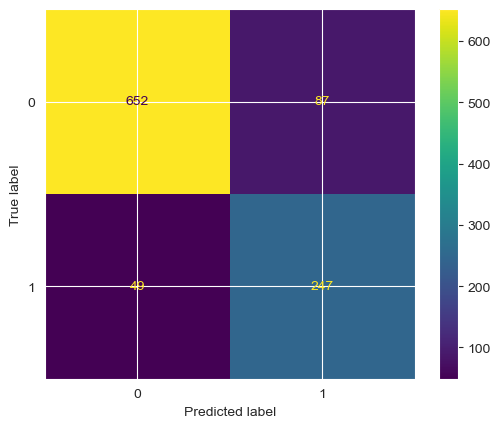

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pca_predictions)
plt.show()

In [63]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)
print(f"LDA Accuracy: {accuracy_score(y_test, lda_predictions)}")

LDA Accuracy: 0.7613526570048309


In [64]:
conf_matrix_lda = confusion_matrix(y_test, lda_predictions)
print('LDA Confusion Matrix:\n', conf_matrix_lda)
print('LDA Classification Report:\n', classification_report(y_test, lda_predictions))

LDA Confusion Matrix:
 [[606 133]
 [114 182]]
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       739
           1       0.58      0.61      0.60       296

    accuracy                           0.76      1035
   macro avg       0.71      0.72      0.71      1035
weighted avg       0.77      0.76      0.76      1035



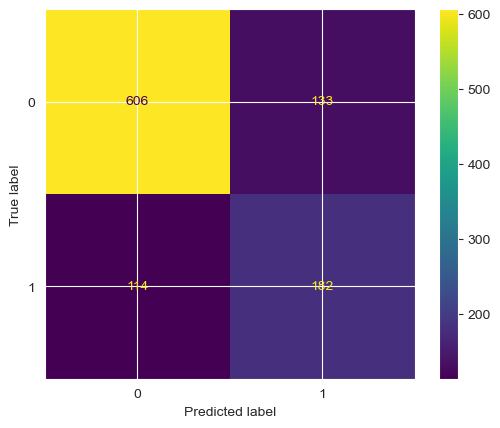

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

In [66]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_cv_predictions = cross_val_predict(knn_classifier, X_train, y_train, cv=cv)
avg_accuracy_knn = np.mean(cross_val_predict(knn_classifier, X_train, y_train, cv=cv) == y_train)
print(f"K-NN Average Accuracy: {avg_accuracy_knn}")

K-NN Average Accuracy: 0.8718878414309886


In [75]:
svd = TruncatedSVD(n_components=100)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [76]:
nb_classifier_svd = GaussianNB()
nb_classifier_svd.fit(X_train_svd, y_train)

GaussianNB()

In [77]:
nb_predictions_svd = nb_classifier_svd.predict(X_test_svd)
print(f"Naive Bayesian with SVD Accuracy: {accuracy_score(y_test, nb_predictions_svd)}")

Naive Bayesian with SVD Accuracy: 0.6850241545893719


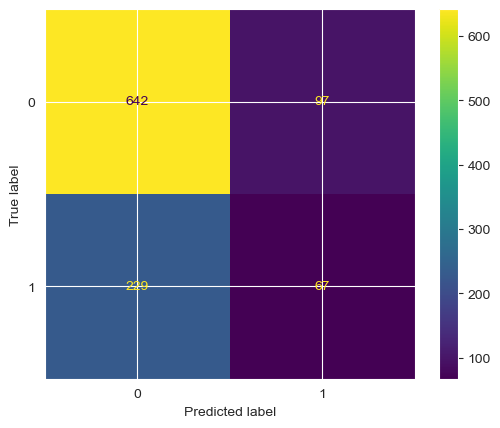

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, nb_predictions_svd)
plt.show()

In [91]:
if accuracy > 0.9:
    print("The model has high accuracy.")
    if precision == 1.0 and recall == 1.0:
        print("The model has high precision and recall, indicating potential overfitting.")
    elif precision < 0.8 or recall < 0.8:
        print("The model may have issues with generalization, potential overfitting.")
    else:
        print("The model has balanced precision and recall.")
elif accuracy > 0.8:
    print("The model has moderate accuracy.")
    if precision < 0.7 or recall < 0.7:
        print("The model may be underfitting or have issues with generalization.")
    else:
        print("The model has balanced precision and recall.")
else:
    print("The model has low accuracy, indicating potential underfitting.")

The model has moderate accuracy.
The model may be underfitting or have issues with generalization.


In [68]:
# underfitten 
 #https://www.kaggle.com/code/sherpalakpa18/email-spam-detection
 #https://www.kaggle.com/code/khaledbnahmed/email-spam-classification-100-accuracy
